# Decomposition
## In this notebook we are going to explain step-by-step our optimal decomposition

# 1) Trotterization

Using the Trotter's formula we split the Hamiltonian into two pieces $H=H_1+H_2$ (instead of 6):
$
    H_1=I^{(0)} \otimes \sigma_x^{(1)} \otimes \sigma_x^{(2)}  + I^{(0)}  \otimes  \sigma_y^{(1)} \otimes \sigma_y^{(2)} + I^{(0)}  \otimes \sigma_z^{(0)} \otimes \sigma_z^{(1)}
$
$
    H_2=\sigma_x^{(0)}\otimes \sigma_x^{(1)} \otimes I^{(2)}  +  \sigma_y^{(0)} \otimes \sigma_y^{(1)} \otimes I^{(2)} + \sigma_z^{(0)} \otimes \sigma_z^{(1)} \otimes I^{(2)}
$



so:
$
    e^{-iHt}=e^{-i(H_1 + H_2)t} \simeq [e^{-iH_1\frac{t}{N}}e^{-iH_2\frac{t}{N}}]^N
$


Now we need to compute a sigle Trotter Step in function of $\frac{t}{N}$

In [1]:
import numpy as np
from sympy import *
from sympy.physics.quantum import TensorProduct as Tp
import warnings
warnings.filterwarnings('ignore')

X = Matrix([[0,1],[1,0]])  #defining the pauli matrices
Y = Matrix([[0,-I],[I,0]])
Z = Matrix([[1,0],[0,-1]])
Id = eye(2)

H1 = Tp(X,X,Id) + Tp(Y,Y,Id) + Tp(Z,Z,Id) 
H1

Matrix([
[1, 0,  0,  0,  0,  0, 0, 0],
[0, 1,  0,  0,  0,  0, 0, 0],
[0, 0, -1,  0,  2,  0, 0, 0],
[0, 0,  0, -1,  0,  2, 0, 0],
[0, 0,  2,  0, -1,  0, 0, 0],
[0, 0,  0,  2,  0, -1, 0, 0],
[0, 0,  0,  0,  0,  0, 1, 0],
[0, 0,  0,  0,  0,  0, 0, 1]])

In [2]:
a = symbols("a")

m = Matrix([
    [1,0,0,0],
    [0,cos(a)*exp(I*a),-I*sin(a)*exp(I*a),0],
    [0,-I*sin(a)*exp(I*a),cos(a)*exp(I*a),0],
    [0,0,0,exp(-I*a)]
])
m

Matrix([
[1,                  0,                  0,         0],
[0,    exp(I*a)*cos(a), -I*exp(I*a)*sin(a),         0],
[0, -I*exp(I*a)*sin(a),    exp(I*a)*cos(a),         0],
[0,                  0,                  0, exp(-I*a)]])

In [3]:
exp_H1p = Tp(m, Id)
exp_H1p

Matrix([
[1, 0,                  0,                  0,                  0,                  0,         0,         0],
[0, 1,                  0,                  0,                  0,                  0,         0,         0],
[0, 0,    exp(I*a)*cos(a),                  0, -I*exp(I*a)*sin(a),                  0,         0,         0],
[0, 0,                  0,    exp(I*a)*cos(a),                  0, -I*exp(I*a)*sin(a),         0,         0],
[0, 0, -I*exp(I*a)*sin(a),                  0,    exp(I*a)*cos(a),                  0,         0,         0],
[0, 0,                  0, -I*exp(I*a)*sin(a),                  0,    exp(I*a)*cos(a),         0,         0],
[0, 0,                  0,                  0,                  0,                  0, exp(-I*a),         0],
[0, 0,                  0,                  0,                  0,                  0,         0, exp(-I*a)]])

where $a=\frac{2t}{N}$

We can also compute $H_2$

In [4]:
exp_H2p = Tp(Id,m)
exp_H2p

Matrix([
[1,                  0,                  0,         0, 0,                  0,                  0,         0],
[0,    exp(I*a)*cos(a), -I*exp(I*a)*sin(a),         0, 0,                  0,                  0,         0],
[0, -I*exp(I*a)*sin(a),    exp(I*a)*cos(a),         0, 0,                  0,                  0,         0],
[0,                  0,                  0, exp(-I*a), 0,                  0,                  0,         0],
[0,                  0,                  0,         0, 1,                  0,                  0,         0],
[0,                  0,                  0,         0, 0,    exp(I*a)*cos(a), -I*exp(I*a)*sin(a),         0],
[0,                  0,                  0,         0, 0, -I*exp(I*a)*sin(a),    exp(I*a)*cos(a),         0],
[0,                  0,                  0,         0, 0,                  0,                  0, exp(-I*a)]])

## So, the final form of a trotter step is the following:

$
    e^{-iHt}=e^{-i(H_1 + H_2)t} \simeq [e^{-iH_1\frac{t}{N}}e^{-iH_2\frac{t}{N}}]^N
$

$
    T_{step}=e^{-iH_1\frac{t}{N}}e^{-iH_2\frac{t}{N}}=
$

In [5]:
Trotter_Step =  exp_H1p * exp_H2p 
Trotter_Step

Matrix([
[1,                           0,                           0,         0,                  0,                           0,                           0,           0],
[0,             exp(I*a)*cos(a),          -I*exp(I*a)*sin(a),         0,                  0,                           0,                           0,           0],
[0, -I*exp(2*I*a)*sin(a)*cos(a),        exp(2*I*a)*cos(a)**2,         0, -I*exp(I*a)*sin(a),                           0,                           0,           0],
[0,                           0,                           0,    cos(a),                  0, -I*exp(2*I*a)*sin(a)*cos(a),       -exp(2*I*a)*sin(a)**2,           0],
[0,       -exp(2*I*a)*sin(a)**2, -I*exp(2*I*a)*sin(a)*cos(a),         0,    exp(I*a)*cos(a),                           0,                           0,           0],
[0,                           0,                           0, -I*sin(a),                  0,        exp(2*I*a)*cos(a)**2, -I*exp(2*I*a)*sin(a)*cos(a),           0],
[

# 2) Single Column Decomposition

This Decomposition works only in a symmetry preserving subspace of the Hamiltonian. In this case we are in the magnetization m=2 subspace.

We need to find a U gate for which $T_{step}^{n}|110>=U_{best}|110>$ that reduces the depth of the circuit.
If the initial state is a vector of the computational basis this decomposition coincides with the preparation of the specific column of the matrix. Our initial state is $|110>$ so we are in this situation. 

The idea is to find a generic circuit that preserves the symmetry and dependes on 2d real parameters,where d is the dimension of the subspace.  
Instead of repeating the Trotter Step we numerically calculate $T_{step}^{n}$ and find the parameters of the optimizated circuit. In this case we need al least a six parameters circuit.

Cause of the magnetization has to preserve during the evolution 

## 2.1) Parametric Circuit  
To find the most generic magnetization preserving circuit we start by defining the general 2-qubit operator that do this and depends on 3 parameters:

In [17]:
a1, r1, f1 = symbols("a1 r1 f1")

H = Matrix([ 
    [1/sqrt(2),1/sqrt(2)],
    [1/sqrt(2),-1/sqrt(2)]
])

cx_01= Matrix([
    [1,0,0,0],
    [0,0,0,1],
    [0,0,1,0],
    [0,1,0,0]
])

def ry(alpha):   # generic ry gate
    return Matrix([ 
        [cos(alpha/2),-sin(alpha/2)],
        [sin(alpha/2),cos(alpha/2)]
    ])

def rz(alpha):   # generic rz gate
    return Matrix([ 
        [exp(-1j*(alpha/2)),0],
        [0,exp(1j*(alpha/2))]
    ])

M1 = Matrix(simplify(Tp(rz(2*f1),Id)*Tp(Id,H)*cx_01*Tp(ry(a1),ry(a1))*cx_01*Tp(Id,H)*Tp(rz(2*r1),Id)))
M1

Matrix([
[exp(1.0*I*(-f1 - r1)),                             0,                              0,                    0],
[                    0, exp(-1.0*I*(f1 + r1))*cos(a1), -exp(-1.0*I*(f1 - r1))*sin(a1),                    0],
[                    0,  exp(1.0*I*(f1 - r1))*sin(a1),   exp(1.0*I*(f1 + r1))*cos(a1),                    0],
[                    0,                             0,                              0, exp(1.0*I*(f1 + r1))]])

We need at least six parameters so we decide to apply $M_{1}$ to qubits $[0,1]$ and $M_{2}$ to $[1,2]$.
$
U_{best}=(I \otimes M_{2}(f_2,r_2,a_2))(M_{1}(f_1,r_1,a_1) \otimes I)
$

In [18]:
a2, r2, f2 = symbols("a2 r2 f2")
M2 = Matrix(simplify(Tp(rz(2*f2),Id)*Tp(Id,H)*cx_01*Tp(ry(a2),ry(a2))*cx_01*Tp(Id,H)*Tp(rz(2*r2),Id)))

Ubest = Tp(M2, Id) * Tp(Id, M1)
Ubest

Matrix([
[exp(1.0*I*(-f1 - r1))*exp(1.0*I*(-f2 - r2)),                                                          0,                                                          0,                                                  0,                                                    0,                                                            0,                                                           0,                                         0],
[                                          0,        exp(-1.0*I*(f1 + r1))*exp(1.0*I*(-f2 - r2))*cos(a1),       -exp(-1.0*I*(f1 - r1))*exp(1.0*I*(-f2 - r2))*sin(a1),                                                  0,                                                    0,                                                            0,                                                           0,                                         0],
[                                          0, exp(1.0*I*(f1 - r1))*exp(-1.0*I*(f2 + r2))*sin(a1)*cos(a2), exp(1.0

Perfect, now imposing the equality between the elements of the $7^{th}$ column (relative to $|110>$) of the parametric matrix $U_{best}$ and of the numerical evaluation $(T_{step})^n$ matrix we can define our Gate.

So, the $(T_{step})^n$ matrix is easly computed here:

In [9]:
steps = 42
time = np.pi
U = eye(8)

for _ in range(steps):
    U=U*Trotter_Step
    U=U.subs(a,2*time/steps)
    U=U.evalf(40)

U.evalf(4)

Matrix([
[1.0 - 1.436e-16*I,                      0,                      0,                     0,                     0,                      0,                      0,                 0],
[                0,    0.9999 + 0.005818*I,  0.001367 + 0.005818*I,                     0, -0.001264 - 0.01164*I,                      0,                      0,                 0],
[                0, -0.001264 + 0.005818*I,     0.9999 - 0.01164*I,                     0, 0.001367 + 0.005818*I,                      0,                      0,                 0],
[                0,                      0,                      0,   0.9999 + 0.005818*I,                     0, -0.001264 + 0.005818*I,   0.001367 - 0.01164*I,                 0],
[                0,   0.001367 - 0.01164*I, -0.001264 + 0.005818*I,                     0,   0.9999 + 0.005818*I,                      0,                      0,                 0],
[                0,                      0,                      0, 0.001367 + 0.

We impose the following equation in order to have the same values on the $7^{th}$ column of both the matrices:
$$
\begin{cases}
b_0=im(U_{4,7}) \\
b_1=im(U_{6,7}) \\
b_2 = im(U_{7,7}) \\
\alpha_0=re(U_{4,7}) \\
\alpha_1=re(U_{6,7}) \\
\alpha_2=re(U_{7,7}) \\
\end{cases}
$$
$$
\begin{cases}
-f_1+r_1-f_2+r_2 = atan(\frac{b_0}{\alpha_0}) =x_0 \\
-\pi-f_1+r_1+f_2+r_2=atan(\frac{b_1}{\alpha_1}) = x_1 \\
f_1+r_1+f_2+r_2=atan(\frac{b_2}{\alpha_2}) = x_2 \\
sin(a_1)sin(a_2)=|U_{4, 7}|=\sqrt{\alpha_0^2+b_0^2} \\
sin(a_1)cos(a_2)=|U_{6, 7}|=\sqrt{\alpha_1^2+b_1^2} \\
cos(a_1)=|U_{7, 7}|=\sqrt{\alpha_2^2+b_2^2} \\
\end{cases}
$$
solving them one can find:
$$
\begin{cases}
r_1 = \frac{x_0+x_2}{2} \\
r_2 = 0 \\
f_2 = \frac{x_2-x_1-\pi}{2} \\
f_1 = -\frac{x_2-x_0}{2} + f_2 \\
a_1=acos(\sqrt{\alpha_2^2+b_2^2}) \\
a_2=acos(\frac{\sqrt{\alpha_1^2+b_1^2}}{sin(a_1)}) \\
\end{cases}
$$


## 3) Decomposition of $M_1$ and $M_2$ operators

We need to find the minimal decomposition of the M gate.
The M gate acts as generic 1 qubit gate on the subspace $|10>,|01>$ and as a phase for $|00>$ and $|11>$
So using the Givens Rotation gate as defined in: "https://arxiv.org/pdf/2104.05695.pdf" that perform a RY in the subspace $|10>,|01>$ with just 2 cnots.
We can think to do a ZYZ decomposition to finally obtain :
$
M=(I \otimes RZ(f))G(r)(I \otimes RZ(a))
$

In [10]:
def angolo(x):
    alpha=re(x)
    beta=im(x)
    if alpha>0:
        return atan(beta/alpha)  
    if alpha<0:
        if beta>=0:
            return atan(beta/alpha)+np.pi
        else:
            return atan(beta/alpha)-np.pi
    if alpha==0:
        if beta>0:
            return np.pi/2
        else:
            return -np.pi/2
    return 0

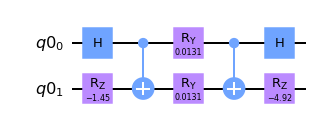

In [11]:
from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute

r1=float(angolo(U[3*8+6])+angolo(U[6*8+6]))/2
r2=0
f1=float(angolo(U[6*8+6])-angolo(U[5*8+6])-np.pi)/2
f2=float((angolo(U[6*8+6])-angolo(U[3*8+6]))/2-f1)
a1=float(acos(abs(U[6*8+6])))
a2=float(acos(abs(U[5*8+6])/sin(a1)))

qr1=QuantumRegister(2)
M1_qc=QuantumCircuit(qr1, name="M1")

M1_qc.rz(2*r1,qr1[1])
M1_qc.h(qr1[0])
M1_qc.cx(qr1[0],qr1[1])
M1_qc.ry(a1,qr1)
M1_qc.cx(qr1[0],qr1[1])
M1_qc.h(qr1[0])
M1_qc.rz(2*f1,qr1[1])

M1_qc.draw(output="mpl")

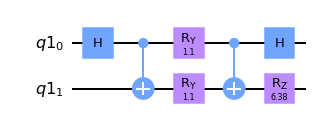

In [12]:
qr2=QuantumRegister(2)
M2_qc=QuantumCircuit(qr2, name="M2")

#M2_qc.rz(2*r2,qr2[1])
M2_qc.h(qr2[0])
M2_qc.cx(qr2[0],qr2[1])
M2_qc.ry(a2,qr2)
M2_qc.cx(qr2[0],qr2[1])
M2_qc.h(qr2[0])
M2_qc.rz(2*f2,qr2[1])

M2_qc.draw(output="mpl")

## Buiding the final evolution cirquit

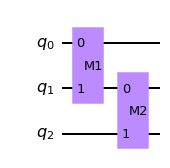

In [13]:
qr = QuantumRegister(3 ,name="q")
qc = QuantumCircuit(qr, name="U")

qc.append(M1_qc, [qr[0],qr[1]])
qc.append(M2_qc, [qr[1],qr[2]])

qc.draw(output="mpl")

In [14]:
def matrix_from_cirquit(qc, phase=0):
    backend = Aer.get_backend('unitary_simulator')
    job = execute(qc, backend, shots=32000)
    result = job.result()
    A=result.get_unitary(qc, decimals=10)*np.exp(1j*phase)
    return Matrix(A)

You can see that the $7^{th}$ columns are equivalent

In [15]:
matrix_from_cirquit(qc)

Matrix([
[0.9999830747 - 0.0058181007*I,                             0,                              0,                             0,                              0,                              0,                              0,                             0],
[                            0, 0.9998967287 - 0.0058175983*I, -0.0015332961 + 0.0130513056*I,                             0,                              0,                              0,                              0,                             0],
[                            0, 0.0012636571 + 0.0058175983*I,  0.4511084576 - 0.0412218799*I,                             0, -0.8914816721 + 0.0051868179*I,                              0,                              0,                             0],
[                            0,                             0,                              0,  0.451147413 - 0.0412254397*I,                              0, -0.8914046949 + 0.0051863701*I,  0.0013669285 - 0.0116351967*I,        

In [16]:
U.evalf(10)

Matrix([
[1.0 - 1.436486988e-16*I,                                  0,                                  0,                                 0,                                 0,                                  0,                                  0,                       0],
[                      0,    0.9998967287 + 0.005817598343*I,  0.001366928468 + 0.005817598343*I,                                 0, -0.001263657122 - 0.01163519669*I,                                  0,                                  0,                       0],
[                      0, -0.001263657122 + 0.005817598343*I,     0.9998967287 - 0.01163519669*I,                                 0, 0.001366928468 + 0.005817598343*I,                                  0,                                  0,                       0],
[                      0,                                  0,                                  0,   0.9998967287 + 0.005817598343*I,                                 0, -0.001263657122 + 0.00581